<a href="https://colab.research.google.com/github/VidhyaKishor27/Pythonbasic/blob/main/Miniproject_3_HR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
hr=pd.read_csv('/content/drive/MyDrive/Python training/Miniproject - python/HR_comma_sep.csv')
print(hr.head(5))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4         

1. How many employees in each of the department (use column "sales")
Output: sales,num_employees

In [ ]:
no_of_emp=hr.groupby(['sales']).size().to_frame('No. of Employees')\
  .sort_values(by='No. of Employees',ascending=True).reset_index()
print(tabulate(no_of_emp,headers=['Sales','No. of Employees'],tablefmt='grid'))

+----+-------------+--------------------+
|    | Sales       |   No. of Employees |
+====+=============+====================+
|  0 | management  |                630 |
+----+-------------+--------------------+
|  1 | hr          |                739 |
+----+-------------+--------------------+
|  2 | accounting  |                767 |
+----+-------------+--------------------+
|  3 | RandD       |                787 |
+----+-------------+--------------------+
|  4 | marketing   |                858 |
+----+-------------+--------------------+
|  5 | product_mng |                902 |
+----+-------------+--------------------+
|  6 | IT          |               1227 |
+----+-------------+--------------------+
|  7 | support     |               2229 |
+----+-------------+--------------------+
|  8 | technical   |               2720 |
+----+-------------+--------------------+
|  9 | sales       |               4140 |
+----+-------------+--------------------+


2. Among employees who left, get the department wise (use column "sales"), number of employees and rank them.
Output:
sales,num_employees,rank


In [ ]:
hr_left=hr.where(hr['left']==1,inplace=False)
emp_left=hr_left.groupby(['sales']).size().to_frame('No. of Employees')\
  .sort_values(by='No. of Employees',ascending=False).reset_index()
emp_left['Rank']=emp_left['No. of Employees'].rank(ascending=False)
print(tabulate(emp_left,headers=['Sales','No. of Employees','Rank'],tablefmt='grid'))

+----+-------------+--------------------+--------+
|    | Sales       |   No. of Employees |   Rank |
+====+=============+====================+========+
|  0 | sales       |               1014 |      1 |
+----+-------------+--------------------+--------+
|  1 | technical   |                697 |      2 |
+----+-------------+--------------------+--------+
|  2 | support     |                555 |      3 |
+----+-------------+--------------------+--------+
|  3 | IT          |                273 |      4 |
+----+-------------+--------------------+--------+
|  4 | hr          |                215 |      5 |
+----+-------------+--------------------+--------+
|  5 | accounting  |                204 |      6 |
+----+-------------+--------------------+--------+
|  6 | marketing   |                203 |      7 |
+----+-------------+--------------------+--------+
|  7 | product_mng |                198 |      8 |
+----+-------------+--------------------+--------+
|  8 | RandD       |           

3.Average number of years (time_spend_company) and average number of monthly hours (average_monthly_hours) for the employees left and not left under each department. Sort the value by sales.
Output:
left,sales,avg_time_spend_company,avg_average_monthly_hours


In [34]:
avg=hr.groupby(by=['left','sales']).aggregate({"average_montly_hours":'mean',"time_spend_company":'mean'}).reset_index()
avg.columns=['Left','Sales','Avg Monthly Hrs','Avg Time Spend']
print(avg)
#print(tabulate(avg,headers=['Left','Sales','Avg Monthly Hrs','Avg Time Spend'],tablefmt='grid'))

    Left        Sales  Avg Monthly Hrs  Avg Time Spend
0      0           IT       198.886792        3.356394
1      0        RandD       198.951952        3.252252
2      0   accounting       199.037300        3.424512
3      0           hr       199.250000        3.192748
4      0   management       200.233766        4.395176
5      0    marketing       198.888550        3.480916
6      0  product_mng       197.765625        3.330966
7      0        sales       199.571657        3.443698
8      0      support       199.140980        3.213859
9      0    technical       198.471083        3.222442
10     1           IT       213.849817        3.860806
11     1        RandD       210.975207        4.000000
12     1   accounting       207.029412        3.794118
13     1           hr       197.306977        3.753488
14     1   management       207.263736        3.758242
15     1    marketing       200.990148        3.857143
16     1  product_mng       207.787879        3.989899
17     1  

4. Under each department, what is the minimum and maximum for both left and not left employees related to time_spend_company and average_monthly_hours. Sort the value by sales.
Output:
left,sales,min_time_spend_company,max_time_spend_company,min_average_monthly_hours,max_average_monthly_hours


In [26]:
min_max=hr.groupby(by=['left','sales']).aggregate({"average_montly_hours":['min','max'],"time_spend_company":['min','max']}).reset_index()
#min_max.columns=['Left','Sales','Min_Avg Monthly Hrs','Max_Avg Monthly Hrs','Min_Time Spend','Max_Time Spend']
print(tabulate(min_max,headers=['Left','Sales','Min_Avg Monthly Hrs','Max_Avg Monthly Hrs','Min_Time Spend','Max_Time Spend'],tablefmt='grid'))

+----+--------+-------------+-----------------------+-----------------------+------------------+------------------+
|    |   Left | Sales       |   Min_Avg Monthly Hrs |   Max_Avg Monthly Hrs |   Min_Time Spend |   Max_Time Spend |
+====+========+=============+=======================+=======================+==================+==================+
|  0 |      0 | IT          |                    96 |                   287 |                2 |               10 |
+----+--------+-------------+-----------------------+-----------------------+------------------+------------------+
|  1 |      0 | RandD       |                    98 |                   287 |                2 |                8 |
+----+--------+-------------+-----------------------+-----------------------+------------------+------------------+
|  2 |      0 | accounting  |                    97 |                   285 |                2 |               10 |
+----+--------+-------------+-----------------------+-------------------

5. Under each department, what is the minimum, maximum, average on last evaluation (last_evaluation) and satisfaction level (satisfaction_level) for both left and not left. Sort the value by sales.
Output:
left,sales,min_last_evaluation,max_last_evaluation,avg_last_evaluation, min_satisfaction_level, max_satisfaction_level,avg_satisfaction_level


In [27]:
avg_min_max=hr.groupby(by=['left','sales']).aggregate({"last_evaluation":['min','max','mean'],"satisfaction_level":['min','max','mean']}).reset_index()
print(tabulate(avg_min_max,headers=['Left','Sales','Min_Last Evaluation','Max_Last Evaluation','Avg_Last Evaluation','Min_Satisfaction Level','Max_Satisfaction Level','Avg_Satisfaction Level'],tablefmt='grid'))

+----+--------+-------------+-----------------------+-----------------------+-----------------------+--------------------------+--------------------------+--------------------------+
|    |   Left | Sales       |   Min_Last Evaluation |   Max_Last Evaluation |   Avg_Last Evaluation |   Min_Satisfaction Level |   Max_Satisfaction Level |   Avg_Satisfaction Level |
+====+========+=============+=======================+=======================+=======================+==========================+==========================+==========================+
|  0 |      0 | IT          |                  0.37 |                     1 |              0.71305  |                     0.12 |                     1    |                 0.67717  |
+----+--------+-------------+-----------------------+-----------------------+-----------------------+--------------------------+--------------------------+--------------------------+
|  1 |      0 | RandD       |                  0.36 |                     1 |        

6.Under each department, what is the count(i.e Sum) on work accidents (work_accident) and promotion for the last 5 years (promotion_last_5years) for both left and not left. Sort the value by sales.
Output:
left,sales,count_work_accident,count_promotion_last_5years


In [34]:
count=hr.groupby(['left','sales']).aggregate({'Work_accident':'sum','promotion_last_5years':'sum'}).reset_index()
print(tabulate(count,headers=['Left','Sales','Count_Work Accident','Count_Promotion Last 5 Yrs'],tablefmt='grid'))


+----+--------+-------------+-----------------------+------------------------------+
|    |   Left | Sales       |   Count_Work Accident |   Count_Promotion Last 5 Yrs |
+====+========+=============+=======================+==============================+
|  0 |      0 | IT          |                   155 |                            0 |
+----+--------+-------------+-----------------------+------------------------------+
|  1 |      0 | RandD       |                   124 |                           27 |
+----+--------+-------------+-----------------------+------------------------------+
|  2 |      0 | accounting  |                    87 |                           14 |
+----+--------+-------------+-----------------------+------------------------------+
|  3 |      0 | hr          |                    82 |                           15 |
+----+--------+-------------+-----------------------+------------------------------+
|  4 |      0 | management  |                    98 |            

7. Bring the output from question 3-6 above.
Output:
left,sales,avg_time_spend_company,avg_average_monthly_hours,min_time_spend_company,max_time_spend_company,min_average_monthly_hours,max_average_monthly_hours,min_last_evaluation,max_last_evaluation,avg_last_evaluation,min_satisfaction_level, max_satisfaction_level,avg_satisfaction_level,count_work_accident,count_promotion_last_5years


In [14]:
overall=hr.groupby(by=['left','sales']).aggregate({"average_montly_hours":['mean','min','max'],"time_spend_company":['mean','min','max'],\
                                                   "last_evaluation":['mean','min','max'],"satisfaction_level":['mean','min','max'],\
                                                   'Work_accident':'sum','promotion_last_5years':'sum'}).reset_index()
overall.columns=['Left','Sales','Avg_Monthly Hrs','Min_Avg Monthly Hrs','Max_Avg Monthly Hrs',\
                                   'Avg_Time Spend','Min_Time Spend','Max_Time Spend',\
                                  'Avg_Last Evaluation','Min_Last Evaluation','Max_Last Evaluation',\
                                   'Avg_Satisfaction Level','Min_Satisfaction Level','Max_Satisfaction Level',\
                                  'Count_Work Accident','Count_Promotion Last 5 Yrs']
print(overall)
#print(tabulate(overall,headers=['Left','Sales','Avg_Monthly Hrs','Min_Avg Monthly Hrs','Max_Avg Monthly Hrs',\
  #                                  'Avg_Time Spend','Min_Time Spend','Max_Time Spend',\
   #                                 'Avg_Last Evaluation','Min_Last Evaluation','Max_Last Evaluation',\
    #                                'Avg_Satisfaction Level','Min_Satisfaction Level','Max_Satisfaction Level',\
     #                               'Count_Work Accident','Count_Promotion Last 5 Yrs'],tablefmt='grid'))

    Left        Sales  Avg_Monthly Hrs  Min_Avg Monthly Hrs  \
0      0           IT       198.886792                   96   
1      0        RandD       198.951952                   98   
2      0   accounting       199.037300                   97   
3      0           hr       199.250000                   98   
4      0   management       200.233766                   97   
5      0    marketing       198.888550                   96   
6      0  product_mng       197.765625                   98   
7      0        sales       199.571657                   96   
8      0      support       199.140980                   96   
9      0    technical       198.471083                   97   
10     1           IT       213.849817                  127   
11     1        RandD       210.975207                  127   
12     1   accounting       207.029412                  127   
13     1           hr       197.306977                  126   
14     1   management       207.263736                 

8. Using output from the question 7 above, plot them as a grouped bar chart (similar to this or see group bar chart below) with seaborn. There must be two bars, one bar representing left and another for not left. This plot is for each unique department values in column “sales.”

X-axis => left or not left
Y-axis => avg_time_spend_company (for each unique department values in column "sales"). This is the average calculated from "time_spend_company"

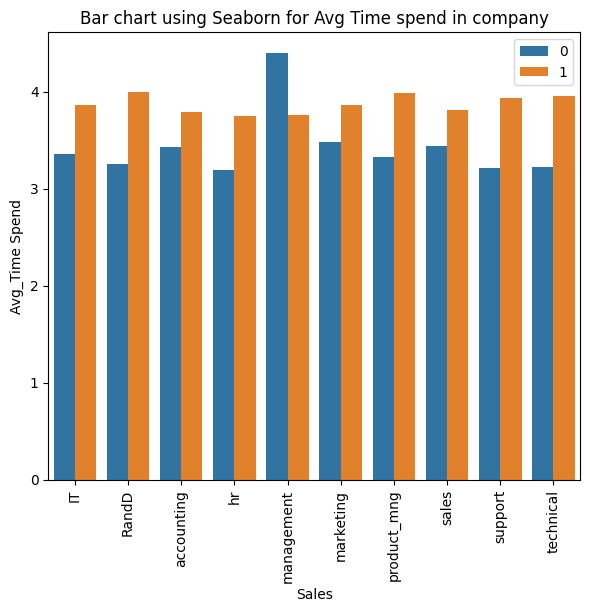

In [32]:
plt.figure(figsize=(6,6))
sns.barplot(x='Sales',y='Avg_Time Spend',hue='Left',data=overall)
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.tight_layout()
plt.title("Bar chart using Seaborn for Avg Time spend in company")
plt.show()

9. For output of 3, plot heat map as shown in the image following with the numbers. One approach is to use seaborn

<ipython-input-52-8251661e5789>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



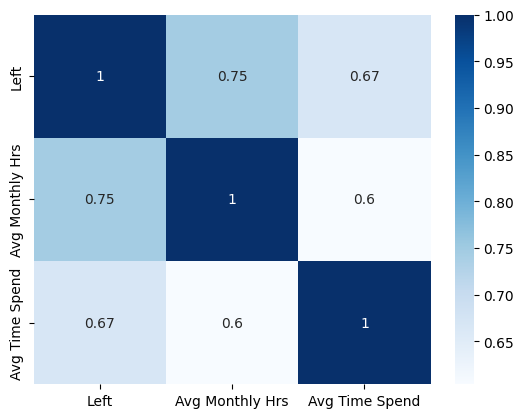

In [52]:
sns.heatmap(avg.corr(),cmap='Blues',annot=True) # heatmap using seaborn
plt.show()
#plt.imshow(avg.corr(),cmap='Greens') # using matplotlib
#plt.show()